In [ ]:
# uncomment next line
#!python3 -m pip install -r requirements.txt``

  Obtaining dependency information for fonttools==4.59.1 from https://files.pythonhosted.org/packages/ac/fe/6e069cc4cb8881d164a9bd956e9df555bc62d3eb36f6282e43440200009c/fonttools-4.59.1-cp312-cp312-macosx_10_13_universal2.whl.metadata
  Using cached fonttools-4.59.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (108 kB)
  Obtaining dependency information for Pebble==5.1.3 from https://files.pythonhosted.org/packages/42/42/218f3d1490af0c5f781f1e54fc1e4a2ca163643807d57890d2a246bd626d/Pebble-5.1.3-py3-none-any.whl.metadata
  Using cached Pebble-5.1.3-py3-none-any.whl.metadata (3.8 kB)
Using cached fonttools-4.59.1-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached Pebble-5.1.3-py3-none-any.whl (36 kB)
  Attempting uninstall: fonttools
    Found existing installation: fonttools 4.59.0
    Uninstalling fonttools-4.59.0:
      Successfully uninstalled fonttools-4.59.0

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip

In [4]:
from main import run_all_tests

In [5]:
tests_results = run_all_tests()

/Users/krolik/dev/mine/tests/abtest/preparation.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[experiment] = df[experiment].fillna(-1).map({


exp_delete_group_chat messages 1
exp_chat_progress_custom arpu 1
exp_delete_group_chat arpu 1
####### exp_delete_group_chat ####### 
Experiment exp_delete_group_chat should be REJECTED; both metrics are rejected
####### exp_chat_progress_custom ####### 
Test mannwhithney for metric messages has positive effect
- p value < alpha: 0.07752988261730814 < 0.12; B is stochastically greater then A
Experiment `exp_chat_progress_custom` should be ACCEPTED
####### exp_add_bttn_fix ####### 
Experiment `exp_add_bttn_fix` should be ACCEPTED, but there are negative and positive effects
Test mannwhithney for metric arpu is negative
- p value < alpha: 0.1147509524428088 < 0.12; B is stochastically less then A
Test permutation for metric arpu is positive
- p value < alpha; 0.032996700329967 < 0.12; 0 is not in CI (0.05420973875121934, 0.35647286177140886)
Test mannwhithney for metric messages is negative
- p value < alpha: 0.007388165514357352 < 0.12; B is stochastically less then A
Test permutation fo

In [6]:
tests_results

defaultdict(<function calculate.run_experiments.<locals>.<lambda>()>,
            {'exp_delete_group_chat': defaultdict(list,
                         {'arpu': [TestResult(test_name='permutation', experiment='exp_delete_group_chat', metric='arpu', p_value=0.27677232276772323, ci=ConfidenceInterval(low=np.float64(-0.047173625728006575), high=np.float64(0.26356428341900123)), decision='REJECT', direction=None, reason='p value > alpha; 0.27677232276772323 > 0.12 no meaningful difference between averages', vis_info={'resample_distribution': array([-0.03593885,  0.05572044,  0.11630802, ...,  0.31144706,
                                  -0.19638013,  0.30217377], shape=(10000,)), 'delta_hat': np.float64(0.10744959309592717), 'perm_null': array([-0.0503597 ,  0.0098279 , -0.12086567, ...,  0.0726866 ,
                                   0.13701285, -0.06443277], shape=(10000,))}),
                           TestResult(test_name='mannwhithney', experiment='exp_delete_group_chat', metric='arpu

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
sns.set_palette('rainbow')

def plot_perm_one(boot_delta, ci, delta_point, perm_null, title='permutation', kde=True):
    boot_delta = np.asarray(boot_delta)
    perm_null  = np.asarray(perm_null)
    lo, hi = ci

    bins = np.histogram_bin_edges(np.r_[boot_delta, perm_null], bins='auto')

    p_two = ((np.abs(perm_null) >= abs(delta_point)).sum() + 1) / (len(perm_null) + 1)

    fig, ax = plt.subplots()
    sns.histplot(boot_delta, bins=bins, stat='density', kde=kde, alpha=0.45,
                 ax=ax, label='bootstrap')

    sns.histplot(perm_null, bins=bins, stat='density', element='step', fill=False, lw=2,
                 ax=ax, label='perm null')

    ax.axvline(lo, ls='--', lw=2, label=f'CI low {lo:.3g}')
    ax.axvline(hi, ls='--', lw=2, label=f'CI high {hi:.3g}')
    ax.axvline(0.0, ls=':',  lw=2, label='null 0')
    ax.axvline(delta_point, ls='-', lw=2, label=f'point {delta_point:.3g}')

    ax.set(xlabel='mean(B) - mean(A)', ylabel='density',
           title=f'{title}  |  p≈{p_two:.4g}')
    ax.legend(loc='best')
    fig.tight_layout()
    return fig, ax

def plot_mw_one(boot_a12, ci, a12_hat, title='bootstrap A12'):
    boot = np.asarray(boot_a12)
    lo, hi = ci

    fig, ax = plt.subplots()
    sns.histplot(boot, stat='density', bins='auto', kde=True, alpha=0.6, ax=ax)
    ax.axvline(lo, ls='--', lw=2, label=f'CI low {lo:.3g}')
    ax.axvline(hi, ls='--', lw=2, label=f'CI high {hi:.3g}')
    ax.axvline(0.5, ls=':',  lw=2, label='null 0.5')
    ax.axvline(a12_hat, ls='-', lw=2, label=f'point {a12_hat:.3g}')
    ax.set(xlabel='A12', ylabel='density', title=title)
    ax.legend(loc='best')

    ax2 = ax.twinx()
    sns.ecdfplot(boot, ax=ax2)
    ax2.set_ylabel('ecdf')

    fig.tight_layout()
    return fig, ax

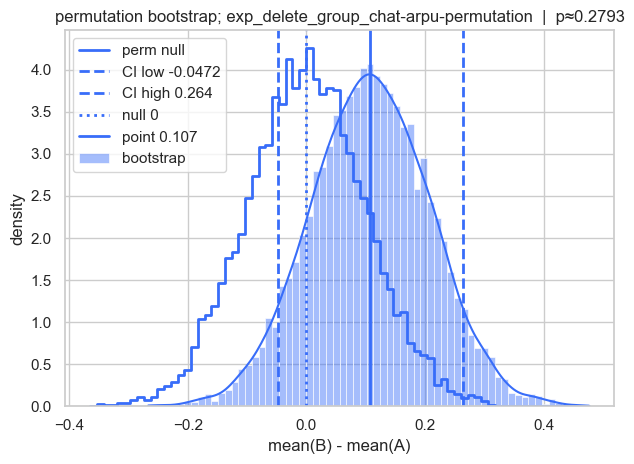

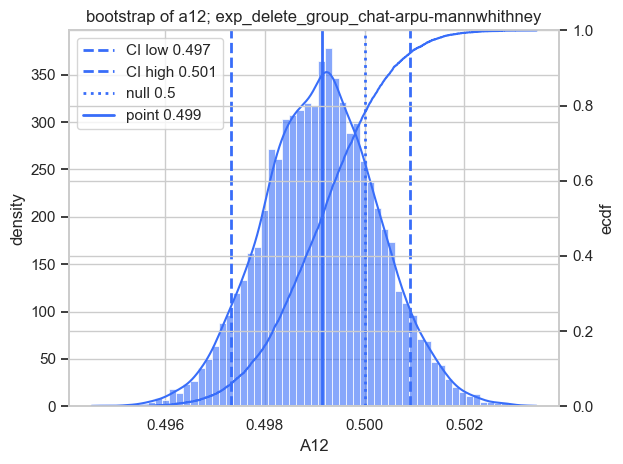

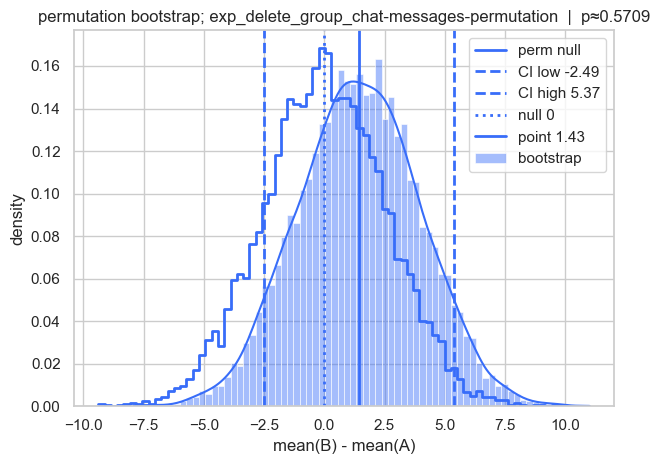

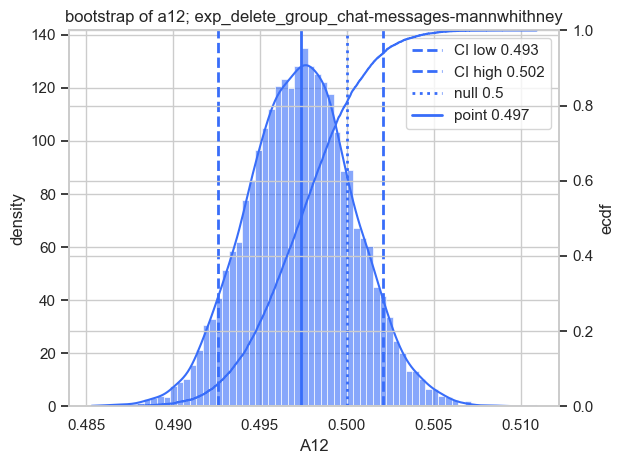

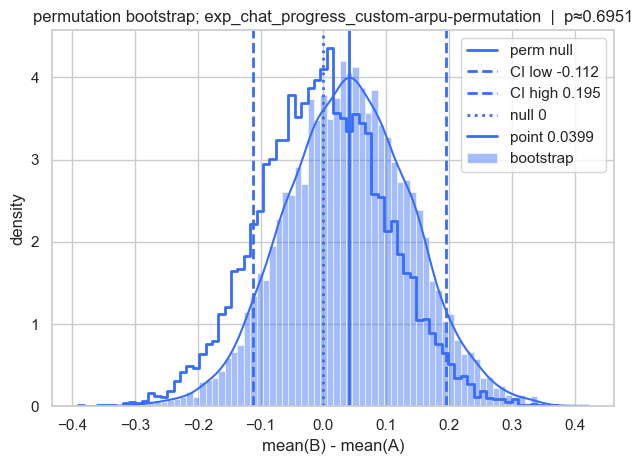

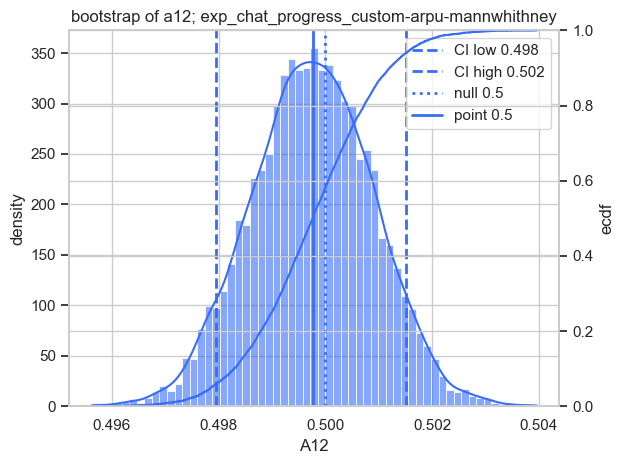

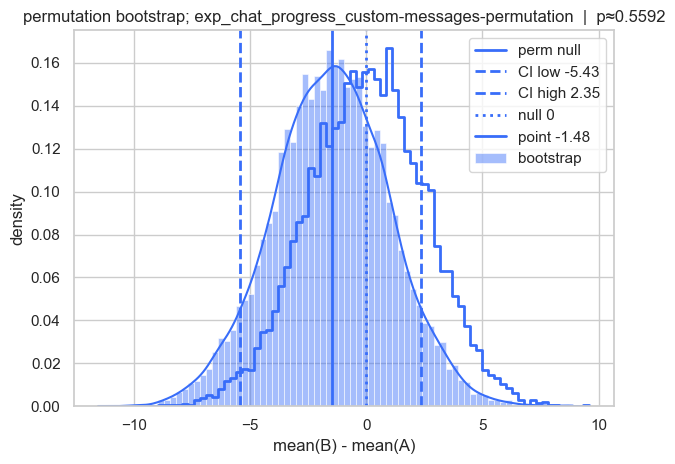

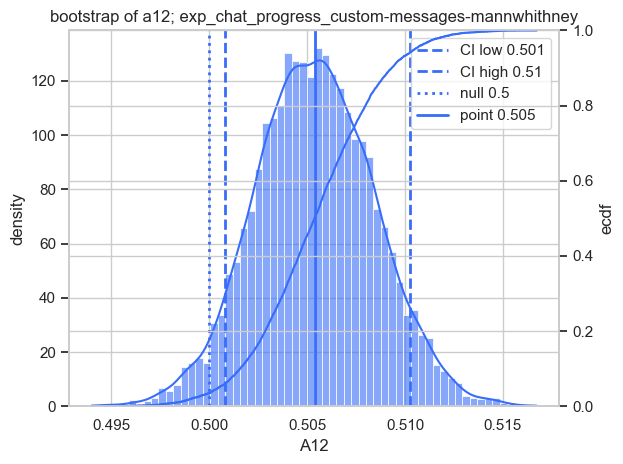

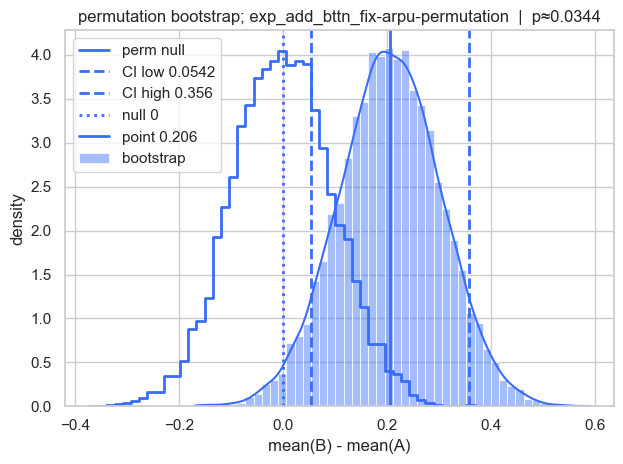

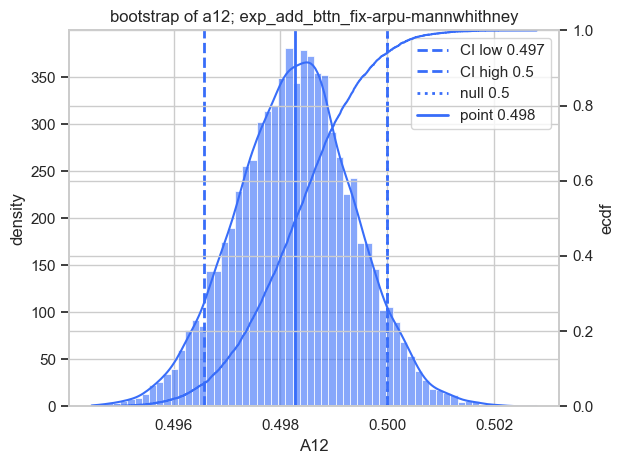

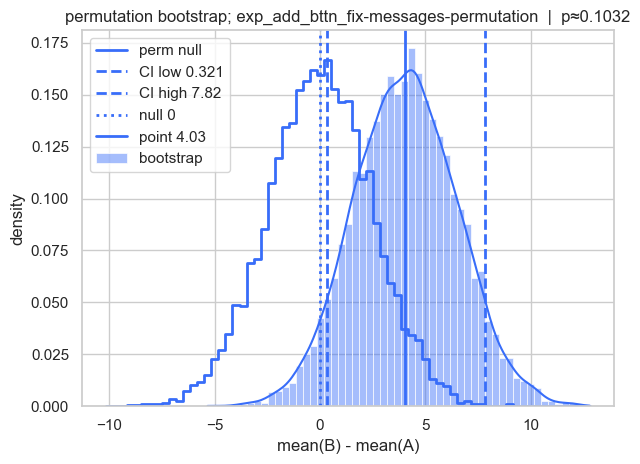

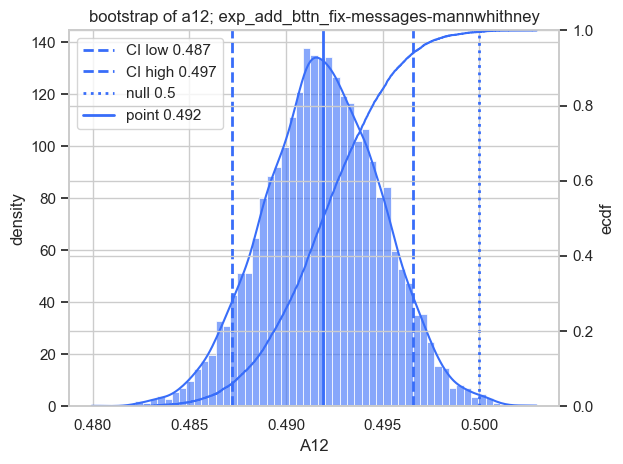

In [ ]:
for experiment, metric_test_results in tests_results.items():
    for metric, test_results in metric_test_results.items():
        for test_result in test_results:
            if test_result.test_name == 'mannwhithney':
                plot_mw_one(
                    test_result.vis_info['resample_distribution'], test_result.ci, test_result.vis_info['a_12'],
                    title=f'bootstrap of a12; {test_result.experiment}-{test_result.metric}-{test_result.test_name}'
                )
            else:
                plot_perm_one(
                    test_result.vis_info['resample_distribution'], test_result.ci,
                    test_result.vis_info['delta_hat'], test_result.vis_info['perm_null'],
                    title=f'permutation bootstrap; {test_result.experiment}-{test_result.metric}-{test_result.test_name}',
                    kde=True,
                )
            